<a href="https://colab.research.google.com/github/100495699/Aprendizaje/blob/main/Aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA simplificado

En esta seccion vamos a cargar y analizar el dataset para entender mejor su estructura. Identificaremos los diferentes campos, sus valores, valores faltantes, rangos y una matriz de dependencia. Además seleccionaremos los campos más importantes para el modelo de predicción de abandonos.

Primero, importaremos todas las librerias necesarios. *Pandas* para leer el dataset, *sklearn* para el desarrollo de los modelos y *numpy* junto con *mathplotlib* para funciones adicionales.

In [2]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

El primer paso será cargar el dataset con *pandas* y mostrar el numero de filas, columnas y el nombre de todas las columnas

In [14]:
dataset = pd.read_csv('attrition_availabledata_05.csv')
num_filas, num_columnas = dataset.shape

# Estructura del dataset
print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")
# Ver nombres de todas las columnas
print("Nombres de las columnas:")
print(dataset.columns.tolist())



Número de filas: 2940
Número de columnas: 31
Nombres de las columnas:
['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


A continuación vemos los diferentes valores únicos que toman los diferentes registros para cada columna. De esta forma será más fácil ver el tipo de las variables (categóricas, ordinales o numéricas)

In [15]:
for col in dataset.columns:
    valores_unicos = dataset[col].unique()
    print(f"Valores '{col}':{valores_unicos}")

Valores 'hrs':[6.61262494 6.02681504 6.96645582 ... 6.59509148 7.38075747 6.45303882]
Valores 'absences':[18 11 12 10 14 15  2 17 23 22  8  4  5  9  6 21  3  7 19 16 20 13 24  1]
Valores 'JobInvolvement':[4 3 2 1]
Valores 'PerformanceRating':[3 4]
Valores 'EnvironmentSatisfaction':[ 3.  4.  2.  1. nan]
Valores 'JobSatisfaction':[ 3.  4.  1.  2. nan]
Valores 'WorkLifeBalance':[ 2.  3.  1.  4. nan]
Valores 'Age':[31 33 48 42 34 53 50 39 37 45 36 30 40 41 27 43 38 24 18 51 32 47 26 46
 44 29 60 22 35 28 59 57 58 55 20 25 54 19 49 52 56 23 21]
Valores 'BusinessTravel':['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Valores 'Department':['Sales' 'Human Resources' 'Research & Development']
Valores 'DistanceFromHome':[10  3  8 11  9  5  6  2  1 28 29 23 19 21 14 25  4  7 16 24 12 26 18 15
 22 17 27 20 13]
Valores 'Education':[3 1 4 2 5]
Valores 'EducationField':['Technical Degree' 'Marketing' 'Medical' 'Life Sciences' 'Other'
 'Human Resources']
Valores 'EmployeeCount':[1]
Valores 'Employe

Una vez tenemos los valores únicos que pueden tomar las variables se observa que:

*   **Variables numericas:** hrs, absences, Age, DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager

*   **Variables categóricas:** BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Attrition

*   **Variables ordinales:** JobInvolvement, PerformanceRating, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, Education, JobLevel, StockOptionLevel, TrainingTimesLastYear

Además, localizamos una serie de variables que toman valores constantes o son ids y, por tanto no aportan información adicional y podrian eliminarse.

* **Variables especiales:** EmployeeCount, EmployeeID, Over18, StandardHours



Si ahora nos centramos en las variables numéricas, hay que tener en cuenta las variables con muchos valores faltantes o valores no validos. Para controlar esto, vamos a ver la cantidad de valores no validos o faltantes para las variables de dicha categoría.


In [8]:
columnas_a_verificar= ["hrs", "absences", "Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked",
 "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]

print(dataset[columnas_a_verificar].isnull().sum())

hrs                         0
absences                    0
Age                         0
DistanceFromHome            0
MonthlyIncome               0
NumCompaniesWorked         13
PercentSalaryHike           0
TotalWorkingYears           6
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


Observamos que en la columna NumCompaniesWorked hay 13 registros que no tienen valor, [DECIDIR QUÉ HACER]

Para las cariables categóricas, es importante saber factores como la cardinalidad, los valores faltantes y, si es necesario, la codificacion de variables para transformarlas a numericas.

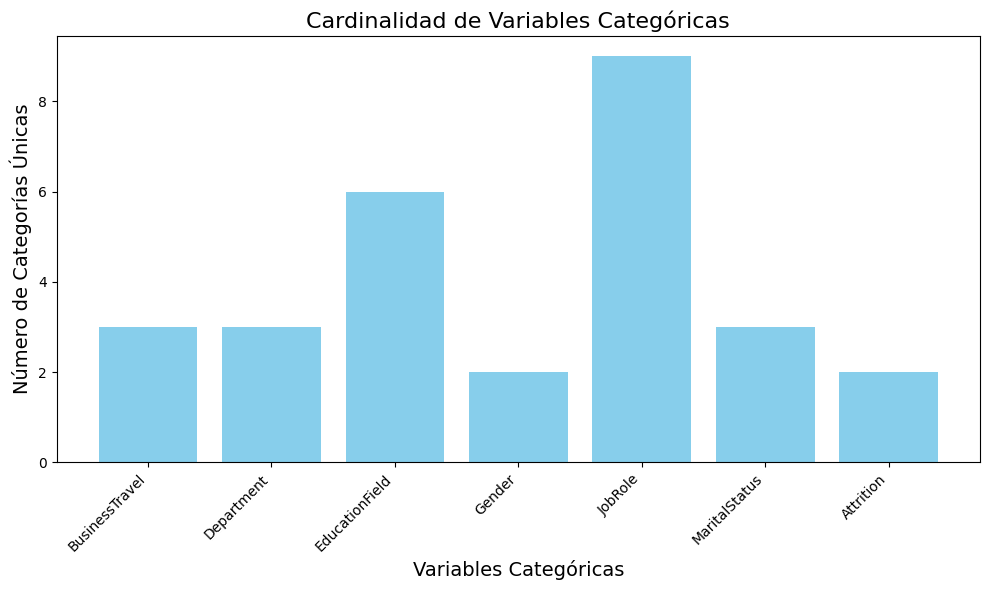

In [16]:
columnas_categoricas = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Attrition"]
card = dataset[columnas_categoricas].nunique()

# Crear un gráfico de barras para mostrar la cardinalidad
plt.figure(figsize=(10, 6))
plt.bar(card.index, card.values, color='skyblue')
plt.title("Cardinalidad de Variables Categóricas", fontsize=16)
plt.xlabel("Variables Categóricas", fontsize=14)
plt.ylabel("Número de Categorías Únicas", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()